In [2]:
import ResultPlayer as rp
rp = reload(rp)
import ClassificationTest
ClassificationTest = reload(ClassificationTest)
import parse_lipidblast as pl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 10})
from matplotlib.pyplot import cm 

import numpy as np

In [3]:
p = rp.ResultPlayer(['results/real_data/5takepeaks_1',
                    'results/real_data/5takepeaks_2',
                    'results/real_data/5takepeaks_3',
                     'results/real_data/5takepeaks_5',
                     'results/real_data/5takepeaks_10'])

Loading tests and results from disk
Loading tests and results from disk
Loading tests and results from disk
Loading tests and results from disk
Loading tests and results from disk


In [4]:
print p.result_tables()

  #  Classifier                                 noise           feature transformation      folds    t/fold [s]    correct    sigma
---  -----------------------------------------  --------------  ------------------------  -------  ------------  ---------  -------
  0  BernoulliNB (0.017 )                       0.00e+00 / 0.0  {'round': -2}                              0.03      47.06        0
  1  BernoulliNB (0.017 )                       0.00e+00 / 0.0  {'round': -2}                              0.04      47.06        0
  2  BernoulliNB (0.017 )                       0.00e+00 / 0.0  {'round': -2}                              0.04      47.06        0
  3  BernoulliNB (0.017 )                       0.00e+00 / 0.0  {'round': -2}                              0.04      47.06        0
  4  BernoulliNB (0.017 )                       0.00e+00 / 0.0  {'round': -2}                              0.04      47.06        0
  5  RidgeClassifier (1.0 0.001 auto )          0.00e+00 / 0.0  {'round': -2

In [5]:
# set up plot style
#xlim = [0.0025, 11, 2, 0.3, 0.02, 0.02, 0.0025]
#ylim = [[0,1], [0.6,0.75], [0.6,0.9], [0.75,0.91], [0.7,0.95], [0.7,0.95], [0,1]]
color=cm.rainbow(np.linspace(0,1,5))

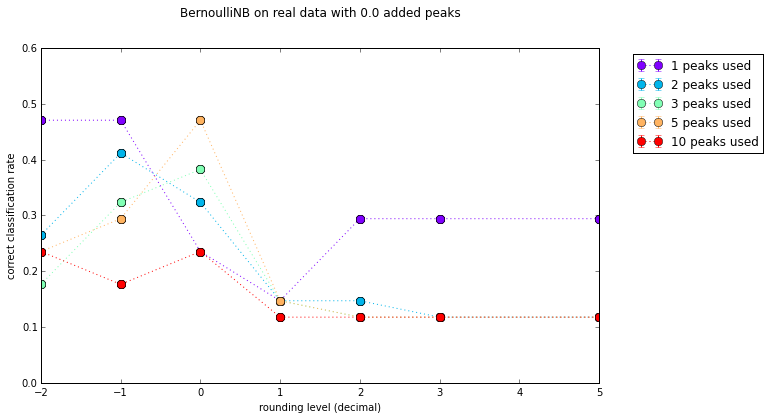

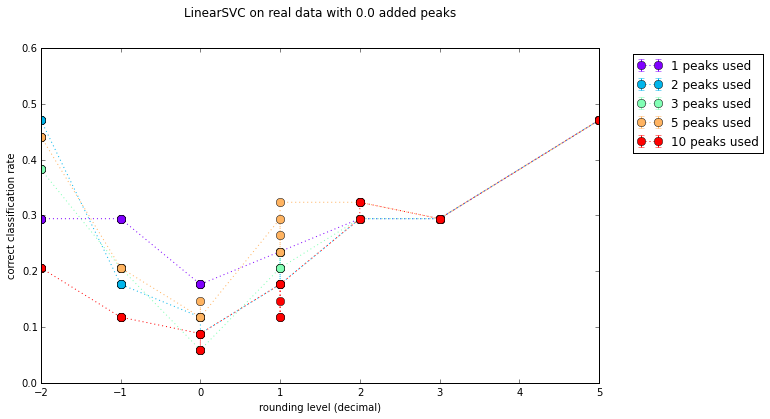

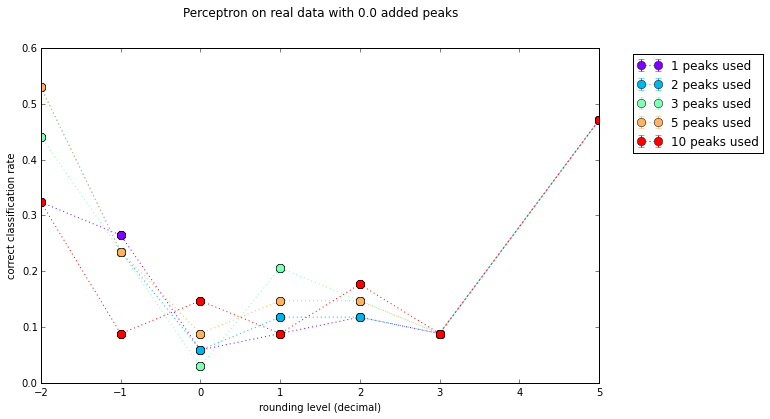

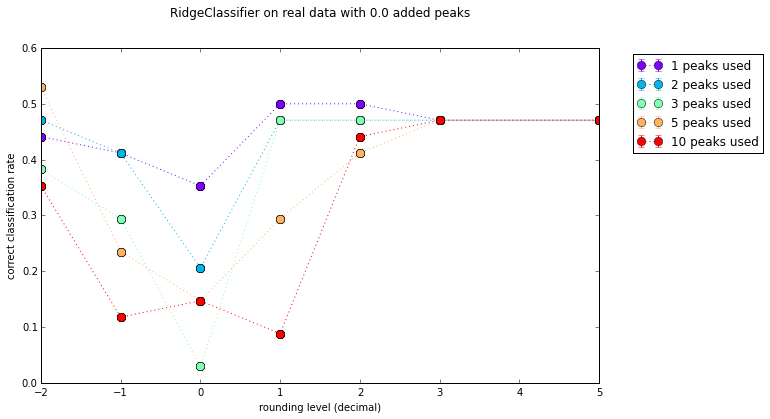

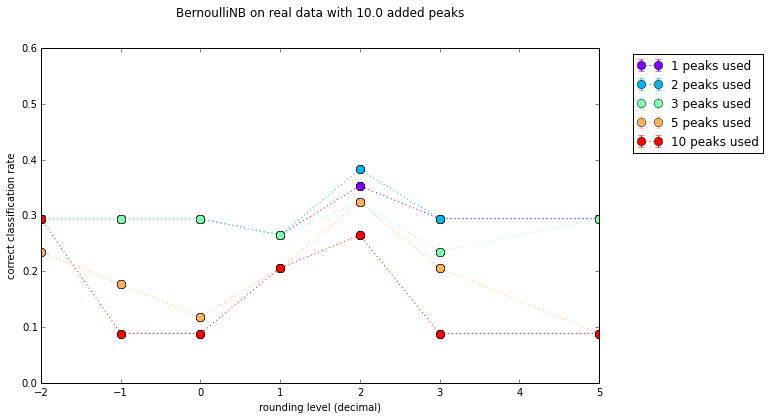

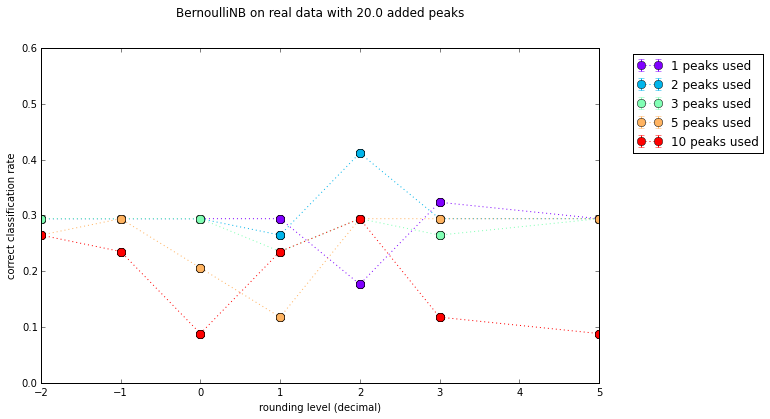

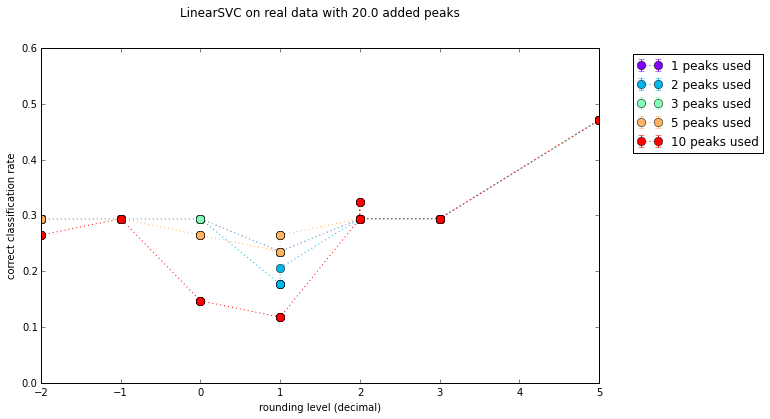

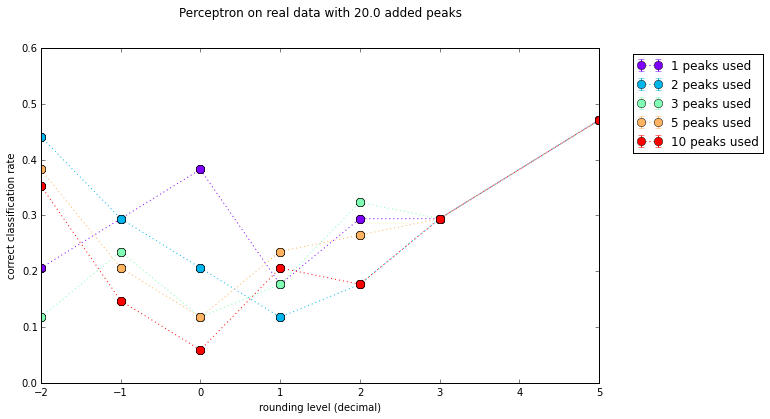

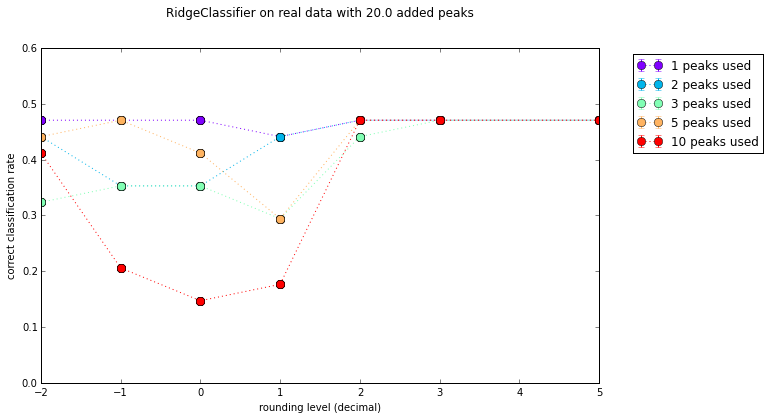

In [6]:
for data_add_peaks, added_peaks, k in p.group_by(p.data, "noise", "add_random_peaks"):
    for current_cl, classifier, i in p.group_by(data_add_peaks, "classifier_name"):
        plt.figure()

        # group by taken peaks, add each one to the graph
        for current_take_peaks, take_peaks, j in p.group_by(current_cl, 'description', 'take_peaks'):       


            rounded = [n['round'] for n in current_take_peaks[:,6]]
            # set no rounding to data precision rounding
            rounded = [5 if r == None else r for r in rounded]
            label = "{} peaks used".format(take_peaks)
            plt.errorbar(rounded, current_take_peaks[:, 8], yerr=current_take_peaks[:, 9], 
                         ls='dotted', marker='o', markersize=8, color=color[j],  label=label)

        """
        Plot output
        """


        plt.title("{} on real data with {} added peaks"
                  .format(classifier, added_peaks), y=1.08)  
        #plt.xlim(0,0.02)
        plt.ylim(0,0.6)  
        plt.ylabel("correct classification rate")
        plt.xlabel("rounding level (decimal)")
        art = [plt.legend(bbox_to_anchor=(1.05, 1), loc=2)]
        #plt.savefig("graphs/noise/{}_{}_rounding_{}.pdf".format(classifier, inp+1, rounded), dpi=300, bbox_inches="tight", additional_artists=art)
        plt.show()
    